In [326]:

%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Add the Functions folder to Python path
sys.path.append("../Functions")  # adjust if needed

from functions import filter_data, plot_indicator

#https://docs.google.com/spreadsheets/d/1BJYCRpalLJLO5wHX488KBdcf-26NAc0nTkngKodzUYA/export?format=csv
df_url = "https://docs.google.com/spreadsheets/d/1E0lyCSxlC0ajNtzjpWo17TX5DEeEjd33E-j6c7fOBcg/export?format=csv"
df = pd.read_csv(df_url)
df.columns = [c.strip() for c in df.columns]

In [327]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
...,...,...,...,...
5224,Indonesia,"Birth rate, crude (per 1,000 people)",2024,NaN
5225,Japan,"Birth rate, crude (per 1,000 people)",2024,NaN
5226,Poland,"Birth rate, crude (per 1,000 people)",2024,NaN
5227,United States,"Birth rate, crude (per 1,000 people)",2024,NaN


In [328]:
df

,Country Name,Indicator Name,Year,Value
0,United States,National savings (% GDP),1980,22.059
1,United States,Unemployment levels (%),1980,7.175
2,United States,GDP per capita,1980,12552.943
3,United States,"Inflation (CPI, %))",1980,86.750
4,Germany,Unemployment levels (%),1980,3.359
...,...,...,...,...
5224,Indonesia,"Birth rate, crude (per 1,000 people)",2024,NaN
5225,Japan,"Birth rate, crude (per 1,000 people)",2024,NaN
5226,Poland,"Birth rate, crude (per 1,000 people)",2024,NaN
5227,United States,"Birth rate, crude (per 1,000 people)",2024,NaN


/var/folders/cc/3rg_c9bd0_3_5zr4j400w21m0000gn/T/ipykernel_39767/1348124582.py:3: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



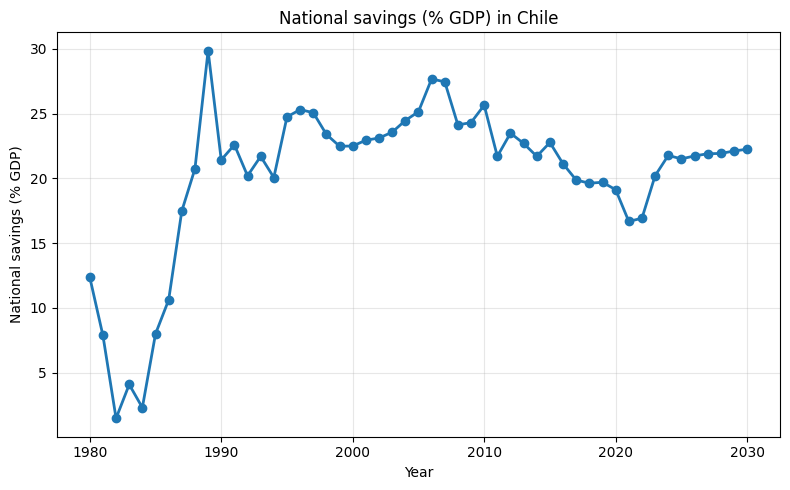

In [329]:
df_chile_savings = filter_data(df, "Chile", "National savings (% GDP)")
fig = plot_indicator(df_chile_savings, "Chile", "National savings (% GDP)")
fig.show()

In [330]:
def plot_indicator_bar(df_filtered, country, indicator):
    """
    Creates a bar chart from a filtered dataframe.
    Returns a Matplotlib figure object.
    Works in both Jupyter and Streamlit.
    """
    fig, ax = plt.subplots(figsize=(8, 5))

    if df_filtered.empty:
        ax.text(0.5, 0.5, "No data available",
                ha="center", va="center", fontsize=12)
        ax.set_axis_off()
        return fig

    # --- KEY CHANGE: Use ax.bar() instead of ax.plot() ---
    ax.bar(df_filtered["Year"], df_filtered["Value"], color='skyblue', edgecolor='black')
    
    # Optional: Rotate x-axis labels for better readability if years are crowded
    ax.set_xticks(df_filtered["Year"]) # Ensure ticks are only on the years available
    ax.tick_params(axis='x', rotation=45) 
    # --- END KEY CHANGE ---

    ax.set_title(f"{indicator} in {country}")
    ax.set_xlabel("Year")
    ax.set_ylabel(indicator)
    ax.grid(axis='y', alpha=0.3) # Typically bar charts only need horizontal grid lines

    plt.tight_layout()
    return fig

In [331]:
df_GDP = df[df["Indicator Name"].str.contains("GDP per capita", case=False, na=False)]

#df_GDP = df[df["Indicator Name"]== "GDP per capita"]
df_GDP.head(29)

,Country Name,Indicator Name,Year,Value
2,United States,GDP per capita,1980,12552.943
6,Denmark,GDP per capita,1980,13824.640
7,Germany,GDP per capita,1980,11150.445
13,Japan,GDP per capita,1980,9671.861
20,South Africa,GDP per capita,1980,3074.684
23,Costa Rica,GDP per capita,1980,2108.750
24,Chile,GDP per capita,1980,2598.159
31,Indonesia,GDP per capita,1980,673.239
33,Ghana,GDP per capita,1980,3239.454
36,"Poland, Republic of",GDP per capita,1980,1600.046


In [332]:
df["Indicator Name"].unique()

array(['National savings (% GDP)', 'Unemployment levels (%)',
       'GDP per capita', 'Inflation (CPI, %))',
       'Urban population (% of total population)', 'Gini index',
       'Life expectancy at birth, total (years)',
       'Current health expenditure (% of GDP)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'Birth rate, crude (per 1,000 people)'], dtype=object)

In [333]:
df["Country Name"].unique()

array(['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana',
       'Poland, Republic of', 'China', "Cote d'Ivoire", 'Poland'],
      dtype=object)

In [334]:
all_countries=['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana',
       'Poland, Republic of', 'China', "Cote d'Ivoire", 'Poland']

In [335]:
def plot_two_indicators_2000_2023(df, countries, ind1, ind2):
    # Filter for selected countries and indicators
    df_f = df[df["Country Name"].isin(countries) & 
              df["Indicator Name"].isin([ind1, ind2])]

    # Split by indicator
    df1 = df_f[df_f["Indicator Name"] == ind1]
    df2 = df_f[df_f["Indicator Name"] == ind2]

    # Pivot for plotting
    df1_pivot = df1.pivot(index="Year", columns="Country Name", values="Value")
    df2_pivot = df2.pivot(index="Year", columns="Country Name", values="Value")

    # Align all years across both indicators
    all_years = sorted(set(df1_pivot.index).union(df2_pivot.index))
    df1_pivot = df1_pivot.reindex(all_years)
    df2_pivot = df2_pivot.reindex(all_years)

    # 🔹 Limit to 2000-2023
    df1_pivot = df1_pivot.loc[2000:2023]
    df2_pivot = df2_pivot.loc[2000:2023]

    # Figure
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Color map (one color per country)
    colors = plt.cm.tab10.colors

    # Plot indicator 1 (solid)
    handles = []
    for i, country in enumerate(countries):
        if country in df1_pivot.columns:
            line, = ax1.plot(
                df1_pivot.index, df1_pivot[country],
                color=colors[i % len(colors)],
                linewidth=2
            )
            handles.append(line)

    ax1.set_ylabel(ind1)
    ax1.set_xlabel("Year")
    ax1.grid(True, linestyle='--', alpha=0.4)

    # Plot indicator 2 (dashed, same color per country)
    ax2 = ax1.twinx()
    for i, country in enumerate(countries):
        if country in df2_pivot.columns:
            ax2.plot(
                df2_pivot.index, df2_pivot[country],
                color=colors[i % len(colors)],
                linestyle="--",
                linewidth=2
            )

    ax2.set_ylabel(ind2)

    # Legend with only country names
    ax1.legend(handles, countries, bbox_to_anchor=(1.15, 1), loc='upper left')

    plt.title(f"{ind1} (solid) and {ind2} (dashed) — {countries} (2000-2023)")
    plt.tight_layout()
    plt.show()



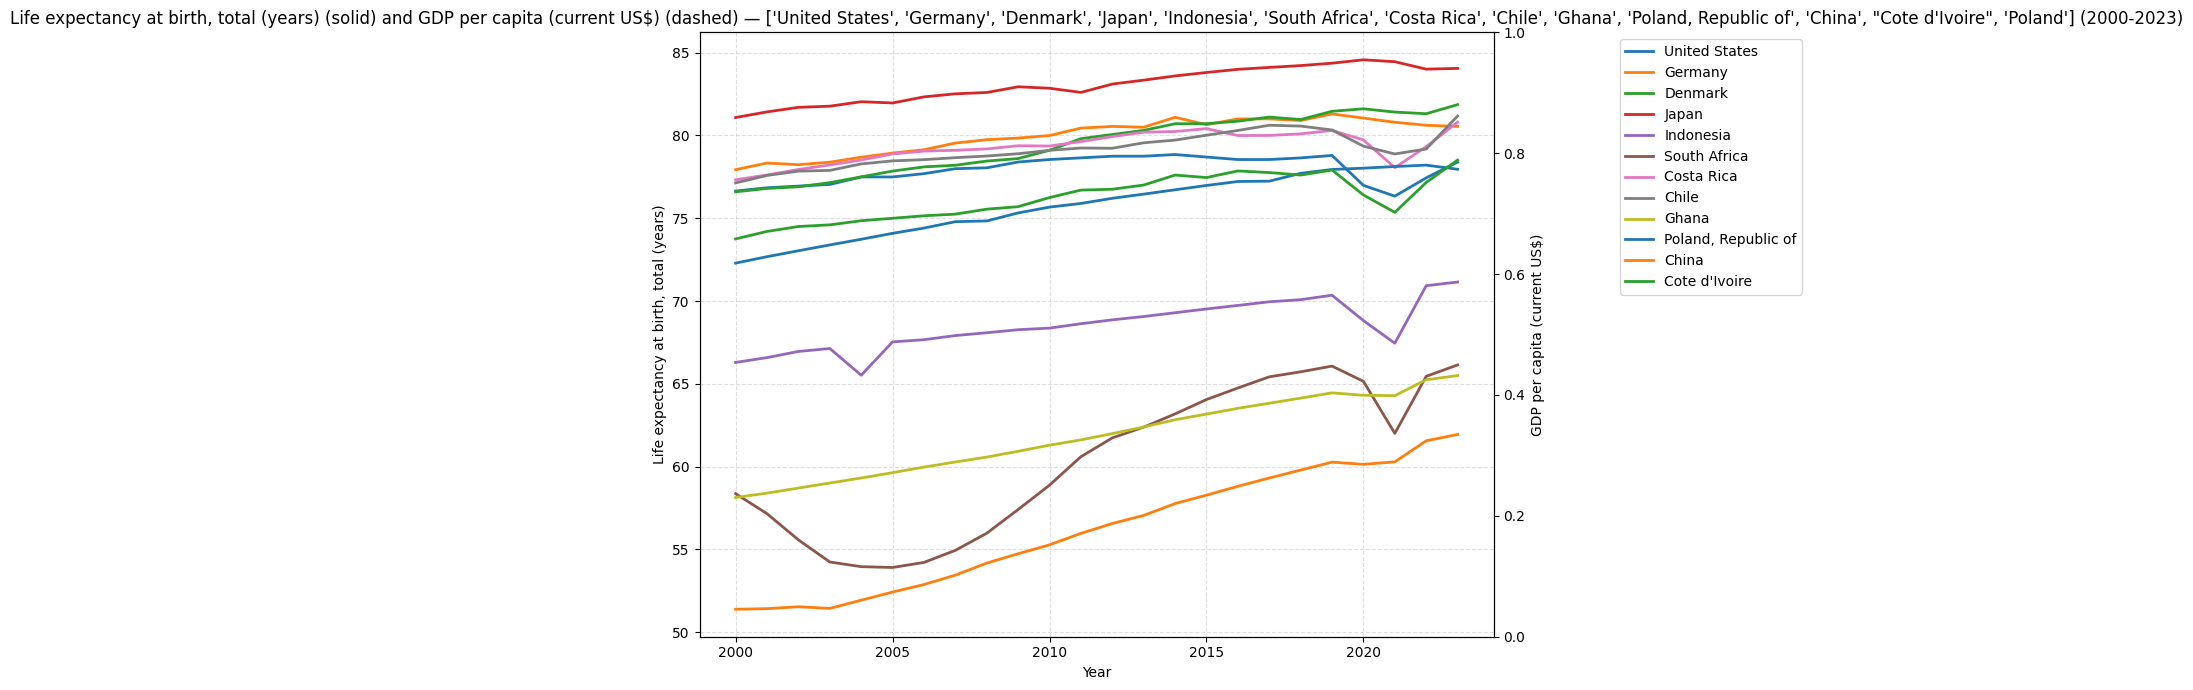

In [336]:
countries_Europe = ["Poland", "Germany", "Denmark"]
countries_America = ["United States", "Costa Rica", "Chile"]

ind1 = "Life expectancy at birth, total (years)"
ind2 = "GDP per capita (current US$)"

plot_two_indicators_2000_2023(df, all_countries, ind1, ind2)

In [337]:
import matplotlib.pyplot as plt

def plot_two_indicators_long(df, countries, ind1, ind2):
    # Filter for selected countries, indicators, and years 1980-2023
    df_f = df[
        df["Country Name"].isin(countries) &
        df["Indicator Name"].isin([ind1, ind2]) &
        df["Year"].between(1980, 2023)
    ]

    # Set up figure
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Color map for countries
    colors = plt.cm.tab10.colors

    # Plot life expectancy (solid) on left axis
    handles = []
    for i, country in enumerate(countries):
        df_plot = df_f[(df_f["Country Name"]==country) & (df_f["Indicator Name"]==ind1)]
        line, = ax1.plot(df_plot["Year"], df_plot["Value"], 
                         color=colors[i % len(colors)],
                         linewidth=2)
        handles.append(line)
    ax1.set_xlabel("Year")
    ax1.set_ylabel(ind1)
    ax1.grid(True, linestyle="--", alpha=0.4)

    # Plot GDP per capita (dashed) on right axis
    ax2 = ax1.twinx()
    for i, country in enumerate(countries):
        df_plot = df_f[(df_f["Country Name"]==country) & (df_f["Indicator Name"]==ind2)]
        ax2.plot(df_plot["Year"], df_plot["Value"], 
                 color=colors[i % len(colors)],
                 linestyle="--",
                 linewidth=2)
    ax2.set_ylabel(ind2)

    # Legend with only country names
    ax1.legend(handles, countries, bbox_to_anchor=(1.15,1), loc='upper left')

    plt.title(f"{ind1} (solid) and {ind2} (dashed) — {countries} (1980-2023)")
    plt.tight_layout()
    plt.show()


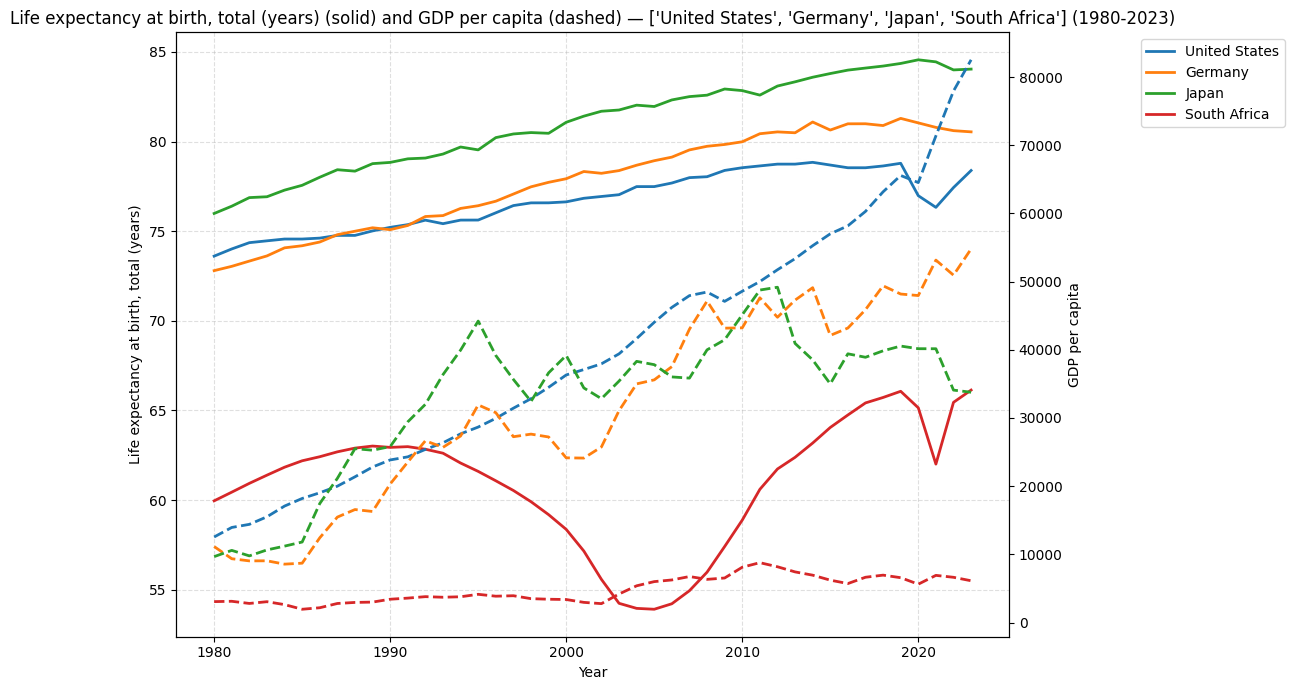

In [338]:
ind1 = "Life expectancy at birth, total (years)"
ind2 = "GDP per capita"

plot_two_indicators_long(df, countries, ind1, ind2)


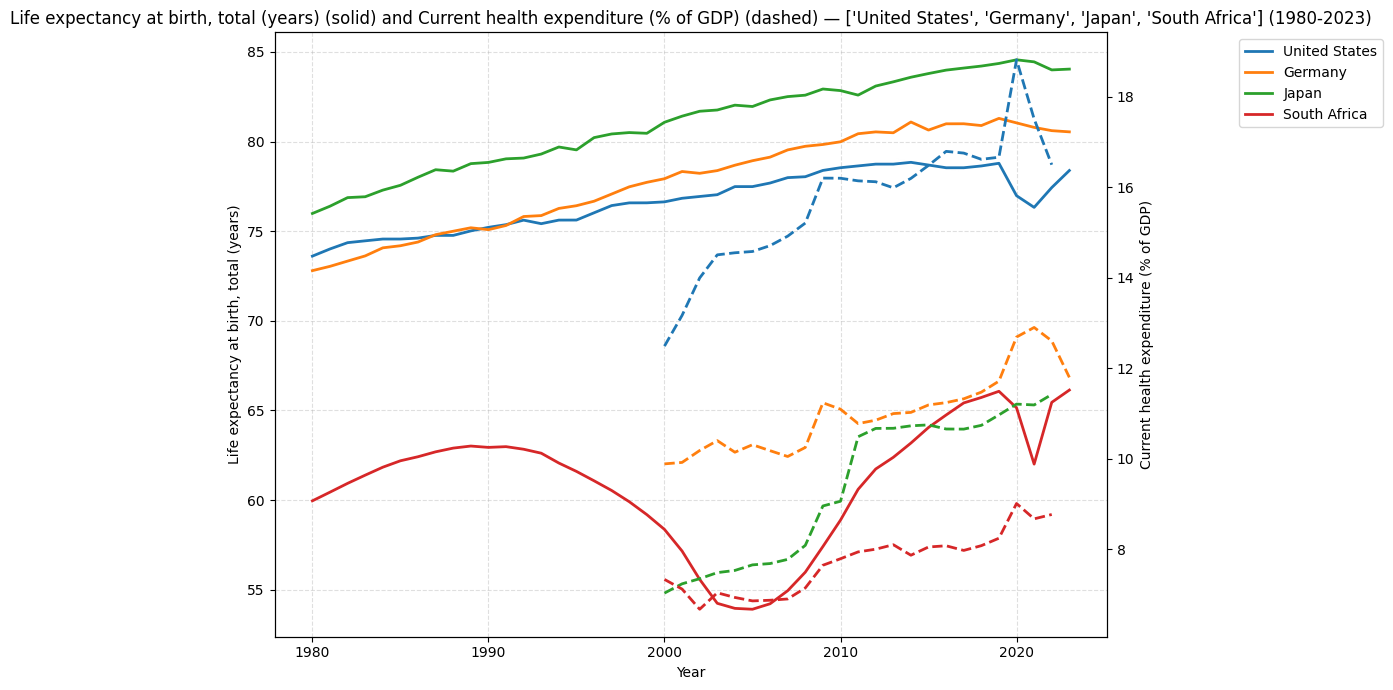

In [339]:
ind1 = "Life expectancy at birth, total (years)"
ind2 = "Current health expenditure (% of GDP)"

plot_two_indicators_long(df, countries, ind1, ind2)

In [340]:
all_countries=['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana',
       'Poland, Republic of', 'China', "Cote d'Ivoire", 'Poland']

In [359]:
df

,Country Name,Indicator Name,Year,Value
0,United States,,1980,22.059
1,United States,,1980,7.175
2,United States,,1980,12552.943
3,United States,,1980,86.750
4,Germany,,1980,3.359
...,...,...,...,...
5224,Indonesia,,2024,NaN
5225,Japan,,2024,NaN
5226,Poland,,2024,NaN
5227,United States,,2024,NaN


In [341]:
mask = df['Indicator Name'] = ''

In [342]:
df['Indicator Name'].value_counts()

Indicator Name
    5229
Name: count, dtype: int64

In [343]:
df.head(20)

,Country Name,Indicator Name,Year,Value
0,United States,,1980,22.059
1,United States,,1980,7.175
2,United States,,1980,12552.943
3,United States,,1980,86.750
4,Germany,,1980,3.359
5,Germany,,1980,NaN
6,Denmark,,1980,13824.640
7,Germany,,1980,11150.445
8,Denmark,,1980,37.754
9,Denmark,,1980,5.177


In [344]:

import numpy as np


def plot_indicator_bar(df, countries, indicator, year=None):

    # Ensure correct column types
    df["Country Name"] = df["Country Name"].astype(str)
    df["Indicator Name"] = df["Indicator Name"].astype(str)
    df["Year"] = pd.to_numeric(df["Year"], errors='coerce')
    df["Value"] = pd.to_numeric(df["Value"], errors='coerce')

    # Filter for selected countries and indicator
    df_f = df[(df["Country Name"].isin(countries)) & (df["Indicator Name"] == indicator)]

    # If year specified, filter by year
    if year is not None:
        df_f = df_f[df_f["Year"] == year]
    else:
        # Take the most recent year per country
        df_f = df_f.sort_values("Year").groupby("Country Name", as_index=False).tail(1)

    # Get values in the same order as countries
    values = []
    for c in countries:
        val = df_f.loc[df_f["Country Name"] == c, "Value"]
        values.append(val.values[0] if not val.empty else np.nan)  # use NaN if missing

    # Plot
    x = np.arange(len(countries))
    fig, ax = plt.subplots(figsize=(10,6))
    bars = ax.bar(x, values, color='skyblue')

    ax.set_xlabel("Country")
    ax.set_ylabel(indicator)
    ax.set_title(f"{indicator} — {', '.join(countries)}")
    ax.set_xticks(x)
    ax.set_xticklabels(countries)
    ax.grid(True, linestyle='--', alpha=0.4, axis='y')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height):
            ax.annotate(f'{height:.1f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0,3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [345]:
countries_new_europe = ["Germany", "Denmark", "Poland"]
countries_America = ["United States", "Chile", "Costa Rica"]
countries_Asia = ["Japan", "China", "Indonesia"]
countries_Africa = ["South Africa", "Ghana", "Cote d'Ivoire"]

In [346]:
df

,Country Name,Indicator Name,Year,Value
0,United States,,1980,22.059
1,United States,,1980,7.175
2,United States,,1980,12552.943
3,United States,,1980,86.750
4,Germany,,1980,3.359
...,...,...,...,...
5224,Indonesia,,2024,NaN
5225,Japan,,2024,NaN
5226,Poland,,2024,NaN
5227,United States,,2024,NaN


In [347]:
df["Country Name"].unique()

array(['United States', 'Germany', 'Denmark', 'Japan', 'Indonesia',
       'South Africa', 'Costa Rica', 'Chile', 'Ghana',
       'Poland, Republic of', 'China', "Cote d'Ivoire", 'Poland'],
      dtype=object)

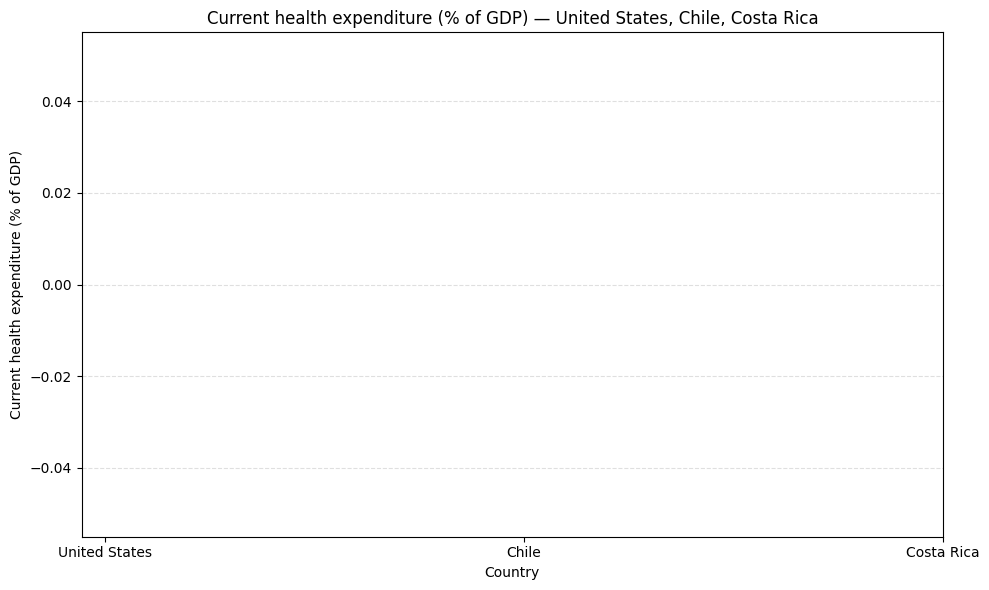

In [348]:
countries_new_europe = ["Germany", "Denmark", "Poland"]
#countries_America = ["USA", "Chile", "Costa Rica"]
#countries_Asia = ["Japan", "China", "Indonesia"]
countries
indicator = "Current health expenditure (% of GDP)"
year = 2023

plot_indicator_bar(df, countries_America, indicator, year)



In [349]:
countries

['United States', 'Germany', 'Japan', 'South Africa']

In [350]:
#PIE CHART for selected Indicator for Various Countries


def pie_chart_different_countries_one_indicator(df, countries, indicator):
    
    # Filter only the countries we want
    df_filter_pie = df[df["Country Name"].isin(countries)].copy()
    
    # Drop rows where indicator is missing / NaN
    #df_filter_pie = df_filter_pie.dropna(subset=[indicator])
    print(df_filter_pie)
    # Extract values
    values = df_filter_pie[df_filter_pie['Indicator Name'] == indicator].Value
    labels = df_filter_pie["Country Name"]
    print(values)
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct="%1.1f%%")
    plt.title(f"{indicator} for Selected Countries")
    plt.show()


In [351]:
[col for col in df.columns if "current health expenditure (% of gdp)" in col.lower()]


[]

In [352]:
['Current Health Expenditure (% of GDP)']


['Current Health Expenditure (% of GDP)']

In [353]:
df['Indicator Name'].value_counts()

Indicator Name
    5229
Name: count, dtype: int64

In [354]:
countries_Europe

['Poland', 'Germany', 'Denmark']

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    5229 non-null   object 
 1   Indicator Name  5229 non-null   object 
 2   Year            5229 non-null   int64  
 3   Value           4250 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 163.5+ KB


In [356]:
!pip3 install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [357]:
import plotly.express as px

def plotly_bar_chart_countries_one_indicator(df, countries, indicator_name, target_year):

    # 1. Clean text columns
    df["Country Name"] = df["Country Name"].astype(str).str.strip()
    df["Indicator Name"] = df["Indicator Name"].astype(str).str.strip()
    
    # 2. Filter by indicator, countries, and year
    df_plot = df[
        (df["Indicator Name"].str.lower() == indicator_name.lower()) &
        (df["Country Name"].isin(countries)) &
        (df["Year"] == target_year)
    ].copy()

    # 4. Create the bar chart
    fig = px.bar(
        df_plot,
        x='Country Name',  # x-axis is the countries from your list
        y='Value',         # y-axis is the value of the indicator
        color='Country Name',
        title=f"{indicator_name} for Selected Countries in {target_year}",
        labels={'Value': f"{indicator_name} (Value)", 'Country Name': 'Country'},
        template="plotly_white"
    )
    
    # 5. Refine layout
    fig.update_layout(
        xaxis_tickangle=-45,
        yaxis_title=f"{indicator_name} (Value)",
        yaxis_range=[0, df_plot['Value'].max() * 1.1]
    )
    
    # 6. Show the chart
    fig.show()


In [358]:
plotly_bar_chart_countries_one_indicator(df, countries_Europe, "gdp per capita", 2010)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df.columns.value_counts()

Country Name      1
Indicator Name    1
Year              1
Value             1
Name: count, dtype: int64

In [ ]:
df['Indicator Name'].unique()

array([''], dtype=object)

In [ ]:
print(df['Year'].unique())
print(df['Indicator Name'].unique())
print(df['Country Name'].unique())


[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021
 2022 2023 2024 2025 2026 2027 2028 2029 2030]
['']
['United States' 'Germany' 'Denmark' 'Japan' 'Indonesia' 'South Africa'
 'Costa Rica' 'Chile' 'Ghana' 'Poland, Republic of' 'China'
 "Cote d'Ivoire" 'Poland']


In [ ]:
plotly_bar_chart_countries_one_indicator(df, countries_Europe, "GDP per capita", "2002")

No data found for indicator 'GDP per capita', year 2002, and selected countries.
